# Libraries, directory and data

In [2]:
#libraries
import numpy as np
import pandas as pd
from statsmodels.tsa.seasonal import seasonal_decompose #📒 for seasonal decomposition
from statsmodels.graphics.tsaplots import month_plot, quarter_plot, plot_acf #📒 for seasonal plot, ACF plot
import matplotlib.pyplot as plt

In [3]:
#load the data
# 📒index_col = 0 removes the index 0,1,...
# 📒parse_dates = True turns data automatically into YYYY-MM-DD format

#YYYY-MM-DD
df = pd.read_csv('nyc_data.csv', index_col = 0, parse_dates = True)
df.head()

,Demand,Easter,Thanksgiving,Christmas,Temperature,Marketing
Date,,,,,,
2015-01-01,720.000885,0,0,0,3.68,41.305
2015-01-02,581.276773,0,0,0,4.73,131.574
2015-01-03,754.117039,0,0,0,7.23,162.700
2015-01-04,622.252774,0,0,0,10.96,160.281
2015-01-05,785.373319,0,0,0,6.92,51.077


In [4]:
#Rename variable
# 📒df.rename()
df = df.rename(columns = {'Demand': 'y'})
df.head(0)

,y,Easter,Thanksgiving,Christmas,Temperature,Marketing
Date,,,,,,


# Data Analysis

In [5]:
#Summary statistics
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
y,2192.0,756.059227,152.143070,425.77532,641.161123,736.94763,855.645886,1384.908525
Easter,2192.0,0.002737,0.052259,0.00000,0.000000,0.00000,0.000000,1.000000
Thanksgiving,2192.0,0.002737,0.052259,0.00000,0.000000,0.00000,0.000000,1.000000
Christmas,2192.0,0.002737,0.052259,0.00000,0.000000,0.00000,0.000000,1.000000
Temperature,2192.0,15.012655,8.772751,-8.85000,7.767500,14.89500,23.230000,30.900000
Marketing,2192.0,126.675890,58.274047,24.58900,78.303500,122.76450,169.395250,299.860000


# Seasonal Decomposition

### Decomposition

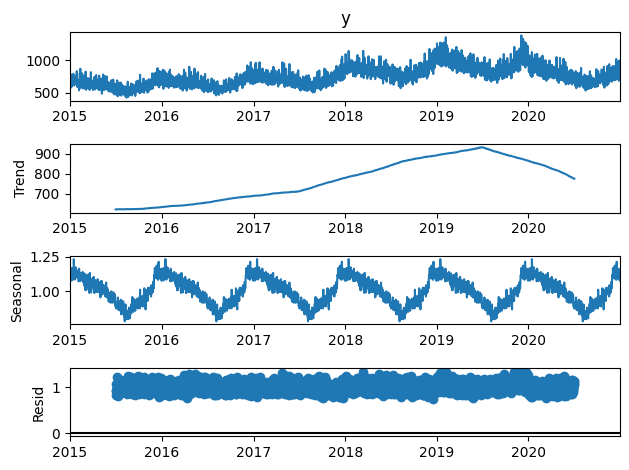

In [6]:
# 📒seasonal_decompose()
decomposition = seasonal_decompose(x = df.y,
                                   model = 'multiplicative',
                                   period = 365)
decomposition.plot();

In [7]:
# 📒if it's additive, its seasonal has negative values.
decomposition = seasonal_decompose(x = df.y,
                                   model = 'additive',
                                   period = 365)
#decomposition.plot();

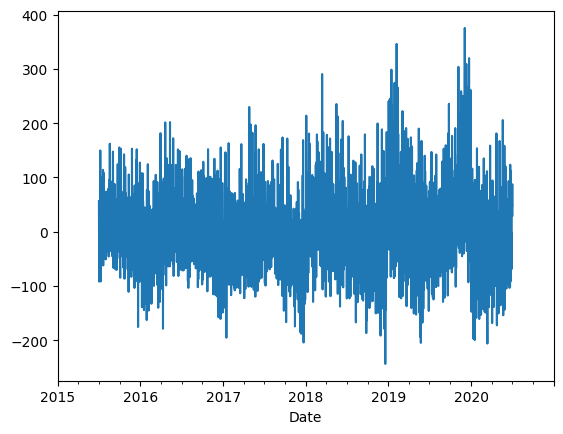

In [8]:
#plotting
decomposition.resid.plot();

### Seasonal

In [9]:
df.y.resample(rule = 'MS').mean() # 📒'MS' data is being resampled to a monthly frequency
df.y.resample(rule = 'Q').mean()
df.y.resample(rule = 'W').mean()

Date
2015-01-04    669.411868
2015-01-11    676.006284
2015-01-18    701.877241
2015-01-25    701.027311
2015-02-01    703.548576
                 ...    
2020-12-06    799.531624
2020-12-13    826.379682
2020-12-20    848.179938
2020-12-27    829.557805
2021-01-03    871.646777
Freq: W-SUN, Name: y, Length: 314, dtype: float64

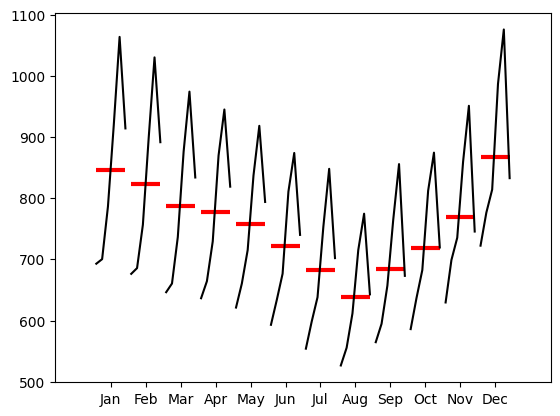

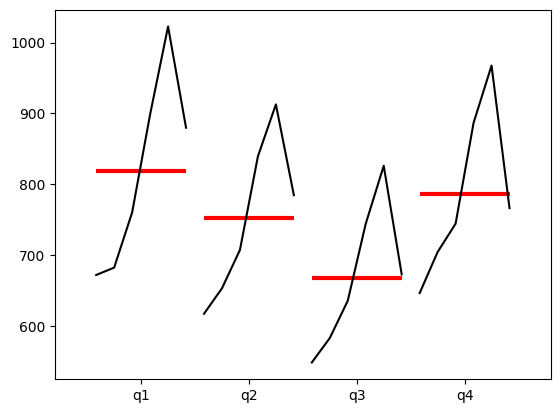

In [10]:
# 📒Seasonal graphs: month_plot()
# 📒black line refers to range
month_plot(df.y.resample(rule = 'MS').mean());
quarter_plot(df.y.resample(rule = 'Q').mean());

In [11]:
#📒Aggregating on specific time frame
df.y.resample(rule = 'MS').mean()

Date
2015-01-01    692.967611
2015-02-01    676.381042
2015-03-01    646.326069
2015-04-01    636.463333
2015-05-01    621.211624
                 ...    
2020-08-01    642.785119
2020-09-01    673.093698
2020-10-01    719.514838
2020-11-01    745.599826
2020-12-01    832.963040
Freq: MS, Name: y, Length: 72, dtype: float64

# Advanced visualization

What we have are: y,Easter,Thanksgiving,Christmas,Temperature, Marketing	

## Events date

In [12]:
#📒Check events date
df[(df.Easter==1)|(df.Thanksgiving == 1)|(df.Christmas == 1)].index

DatetimeIndex(['2015-04-05', '2015-11-26', '2015-12-25', '2016-03-27',
               '2016-11-24', '2016-12-25', '2017-04-16', '2017-11-23',
               '2017-12-25', '2018-04-01', '2018-11-22', '2018-12-25',
               '2019-04-21', '2019-11-28', '2019-12-25', '2020-04-12',
               '2020-11-26', '2020-12-25'],
              dtype='datetime64[ns]', name='Date', freq=None)

## Visualization for year 2015

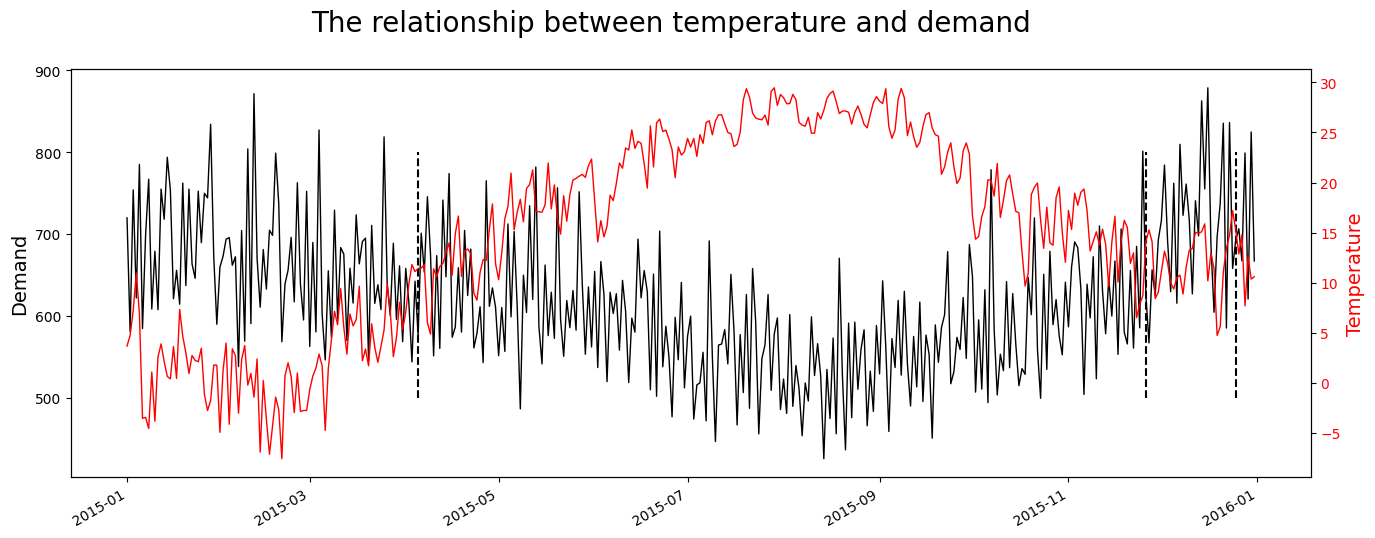

In [13]:
#Create a version B of the dataframe
df_plot = df.loc['2015-01-01':'2015-12-31']

#Define the colors
temp_color = 'red'
y_color = 'black'

#plot
fig, ax1 = plt.subplots(figsize = (16,6))
ax2 = ax1.twinx() 

#Data and Lines
ax1.plot(df_plot.index, df_plot.y, color = y_color, lw = 1)
ax2.plot(df_plot.index, df_plot.Temperature, color = temp_color, lw = 1)

#Title and dates
fig.suptitle("The relationship between temperature and demand", fontsize = 20)
fig.autofmt_xdate()

#first axis
ax1.set_label("Date")
ax1.tick_params(axis = "y", labelcolor = y_color)
ax1.set_ylabel("Demand", color = y_color, fontsize = 14)

#second axis
ax2.tick_params(axis = "y", labelcolor = temp_color)
ax2.set_ylabel("Temperature", color = temp_color, fontsize = 14)

#📒Add holidays or events 
events = df_plot[(df_plot.Easter == 1) | (df_plot.Thanksgiving == 1)|(df_plot.Christmas == 1)].index
ax1.vlines(x = events, ymin = 500, ymax = 800, color = 'k', ls = '--')

## Correlation

In [14]:
#correlation
df[['y', 'Temperature', 'Marketing']].corr()
# 📒'-0.4'means when temp goes higher, the demand decreases

,y,Temperature,Marketing
y,1.000000,-0.400261,0.275139
Temperature,-0.400261,1.000000,-0.185626
Marketing,0.275139,-0.185626,1.000000


## ACF and Partial ACF

The ACF plot displays the ***y: correlation coefficients*** and ***x:the lag***. The lag represents the ***time shift*** between the original time series and its lagged version. The correlation coefficient indicates the ***strength and direction of the linear relationship*** between the original time series and the lagged version at a particular lag.
***The correlation will decrease with higher lags.***

/Users/aurorafu/opt/anaconda3/lib/python3.9/site-packages/pmdarima/utils/visualization.py:220: FutureWarning: the 'unbiased'' keyword is deprecated, use 'adjusted' instead
  res = tsaplots.plot_acf(


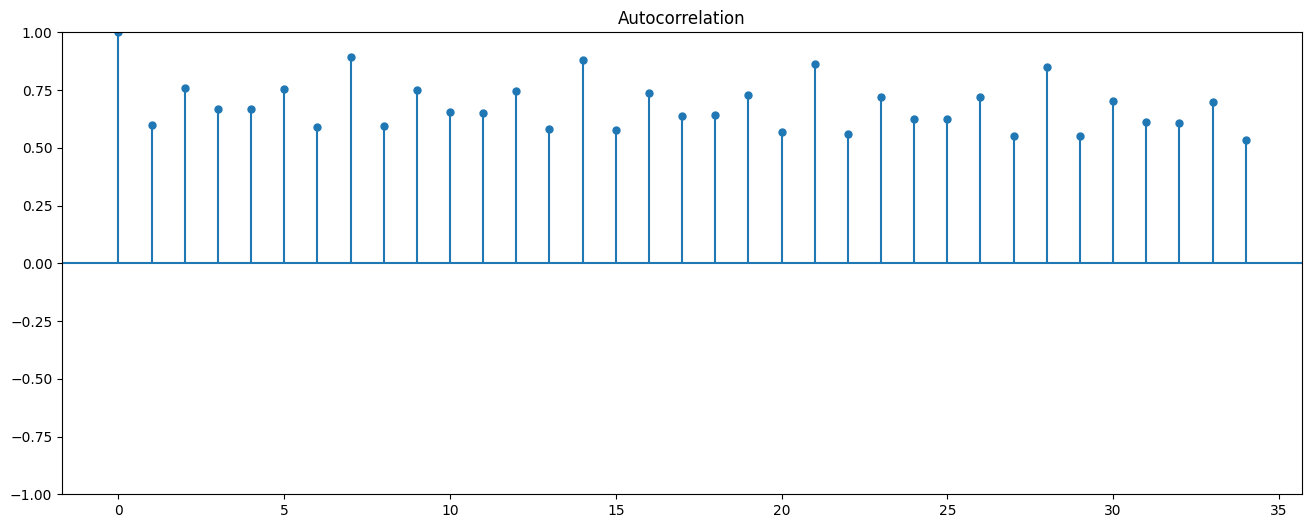

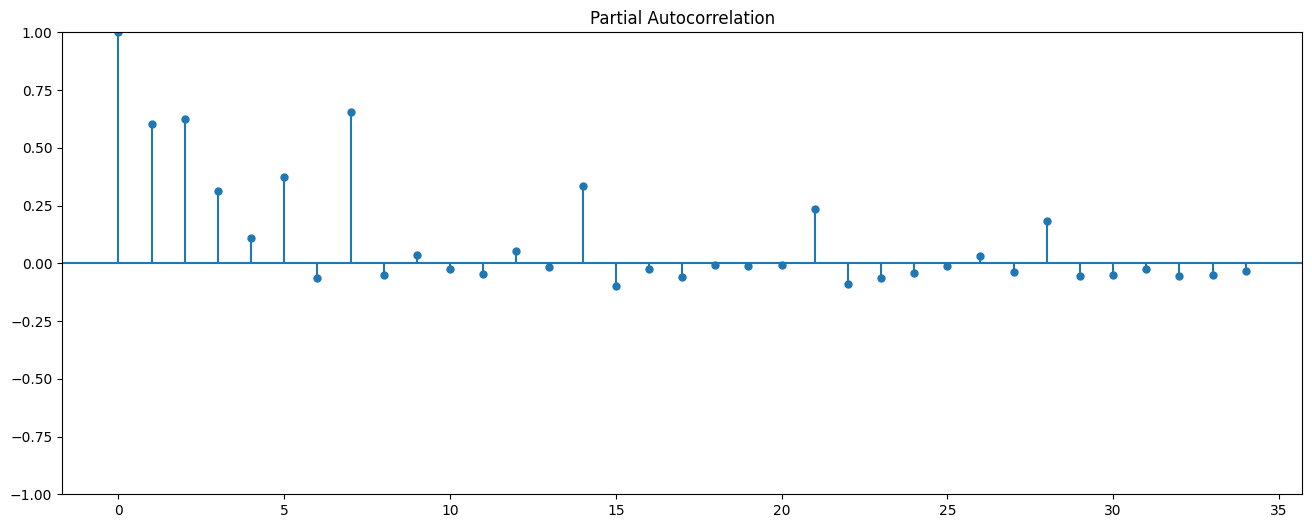

In [17]:
import pmdarima as pm

#Auto-Correlation: ACF plot
plt.rcParams["figure.figsize"] = (16,6)

pm.plot_acf(df.y) 
pm.plot_pacf(df.y)
#It takes the time series data df.y as input and calculates the auto-correlation coefficients at various lags

plt.show();

### Why do we care about acf?

Auto-correlation function (ACF) is a valuable tool for analyzing time series data. Here are a few reasons why we care about ACF:

1. Identifying Patterns: ACF helps us identify any underlying patterns or trends in a time series. By analyzing the correlation between the values of a series and its lagged versions, we can observe if there are any ***repeating patterns or cyclic behavior present in the data.***


2. Seasonality Detection: ACF can reveal seasonality patterns in a time series. Seasonality refers to regular and predictable fluctuations in the data that occur within a specific time frame, such as daily, weekly, monthly, or yearly cycles. ACF can help ***identify the time lag*** at which the highest correlation occurs, indicating the presence of seasonality.


3. Model Selection: ACF aids in selecting appropriate models for time series analysis and forecasting. The correlation structure revealed by the ACF plot provides insights into the type of model that might best capture the behavior of the data. For example, ***if the ACF plot shows a significant correlation at lag 1 but a quick decay afterwards, it suggests that an autoregressive (AR) model might be suitable.***


4. Estimating Lag Order: ACF can assist in determining the optimal lag order for autoregressive or moving average models. The lag order represents the number of previous time steps used to predict the current value in a model. ACF plots help identify when the correlation coefficients fall within the acceptable range (e.g., within a confidence interval) to determine the appropriate lag order.


5. Checking Stationarity: ACF is useful in examining the stationarity of a time series. Stationarity refers to a property where the statistical properties of a time series, such as mean and variance, remain constant over time. ACF can help assess if there is any significant correlation between consecutive observations, which is an indicator of non-stationarity.

Overall, ACF provides insights into the correlation structure, periodicity, and potential modeling approaches for time series data. It helps uncover underlying patterns and guide further analysis or modeling decisions.


### What is pACF?

The Partial Autocorrelation Function (PACF) provides insights into the direct relationship between an observation and its lagged values while controlling for the intermediate lags. In other words, it helps identify the direct effect of past observations on the current observation, excluding the influence of intermediate lags.

The PACF plot is a graph that shows the partial autocorrelation coefficients on the y-axis, and the lag or time period on the x-axis. The partial autocorrelation coefficient represents the correlation between the current observation and its lagged values, after removing the effects of the intermediate lags.

The PACF plot can be useful in determining the appropriate order of the autoregressive (AR) term in an ARIMA or SARIMAX model. The PACF plot is typically used to identify the lag values at which the partial autocorrelation coefficients are significantly different from zero.

If a partial autocorrelation coefficient is significantly different from zero at a specific lag, it suggests that there is a direct and significant relationship between the current observation and its lagged value at that particular lag. Based on the significant peaks in the PACF plot, you can determine the appropriate order for the AR term in your ARIMA or SARIMAX model.

In summary, the PACF plot helps in understanding the direct influence of past observations on the current observation and provides insights into the appropriate order for the AR term in the model.